In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [5]:
# Load dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, width, petal length, width)
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracies[name] = acc  # Store accuracy

# Print accuracy of each model
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}")


Logistic Regression: 0.93
K-Nearest Neighbors: 0.93
Support Vector Machine: 1.00
Decision Tree: 0.93
Random Forest: 0.90


C:\Users\saiteja\AppData\Local\Temp\ipykernel_73648\3438531388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=acc_df, palette="viridis")


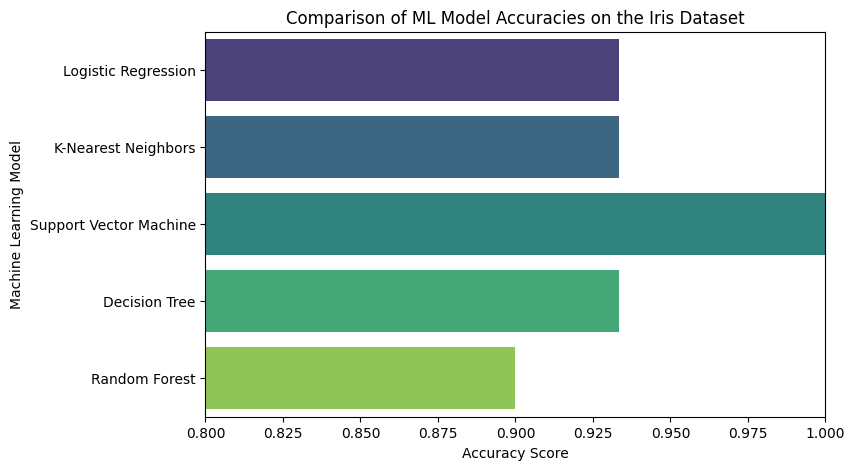

In [7]:
# Convert to DataFrame for visualization
acc_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])

# Plot accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x="Accuracy", y="Model", data=acc_df, palette="viridis")
plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Model")
plt.title("Comparison of ML Model Accuracies on the Iris Dataset")
plt.xlim(0.8, 1.0)  # Since Iris dataset is simple, all accuracies will be high
plt.show()

